📊 Financial Sentiment Analysis Pipeline (Pure Python)
🔧 Using custom keyword-based sentiment analysis
📄 Loaded 9 financial text samples
📊 Companies covered: AAPL, TSLA, MSFT, MARKET, AMZN, JPM, TECH, GOOGL, NFLX
📈 Categories: earnings, operations, growth, macro, competition, regulatory, innovation

Sample Data:
                                                text          source company  \
0  Apple reported strong quarterly earnings with ...  financial_news    AAPL   
1  Tesla faces significant challenges with produc...  financial_news    TSLA   
2  Microsoft continues to dominate cloud computin...  financial_news    MSFT   
3  Federal Reserve signals potential interest rat...   economic_news  MARKET   
4  Amazon Web Services reports declining growth r...  financial_news    AMZN   

        date     category  
0 2024-01-15     earnings  
1 2024-01-10   operations  
2 2024-01-12       growth  
3 2024-01-08        macro  
4 2024-01-14  competition  

🔄 Analyzing sentiment with custom key

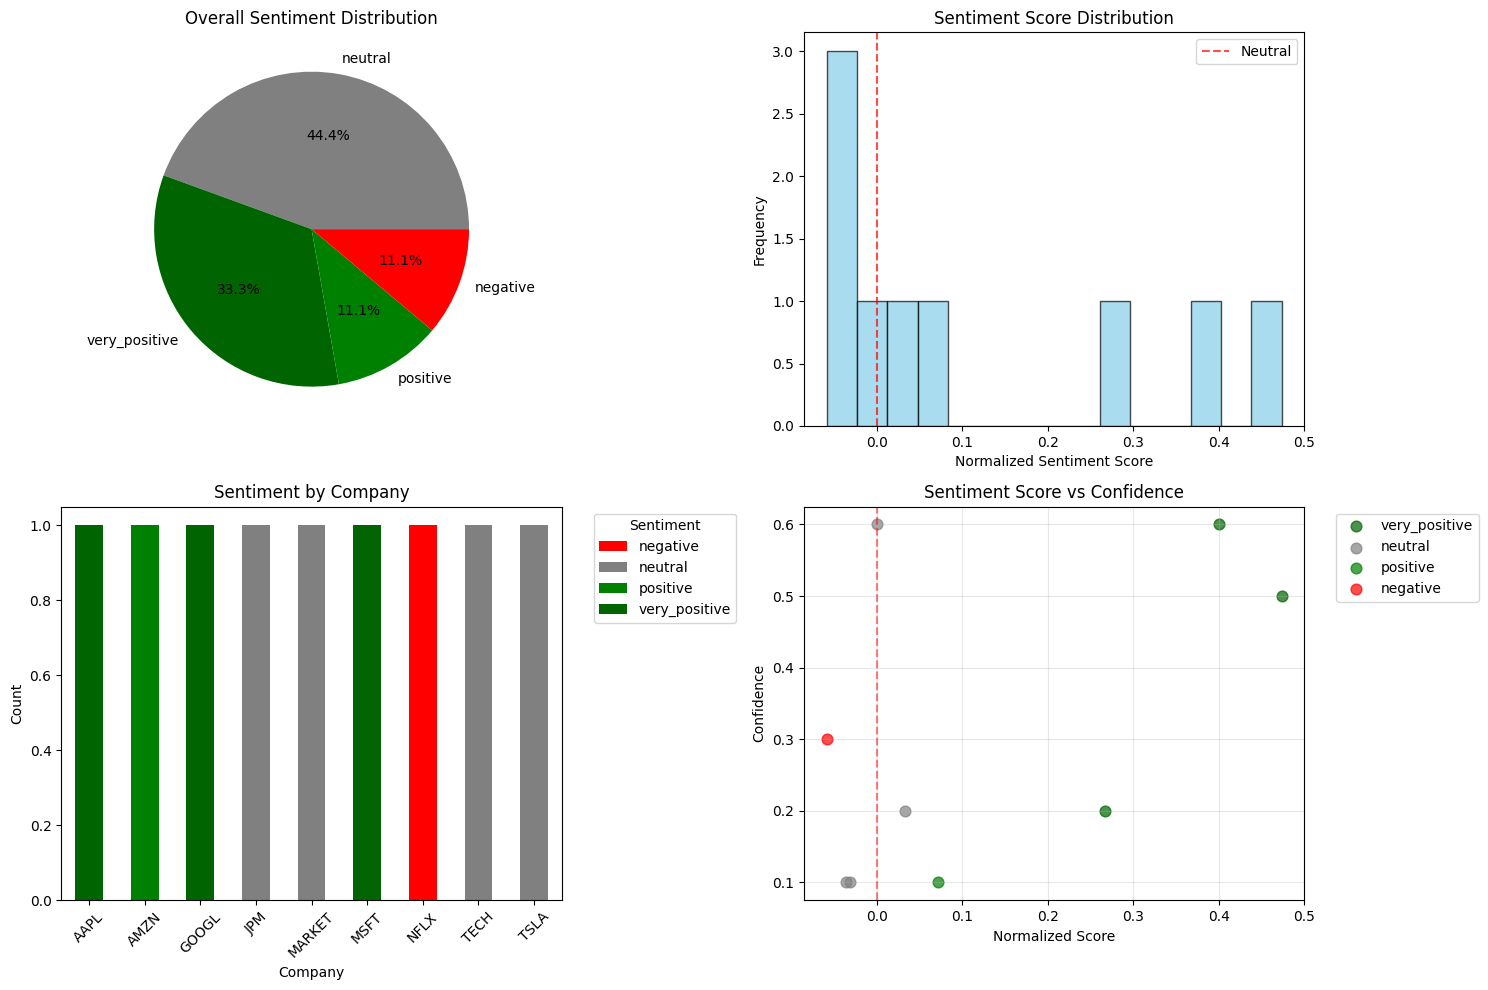


📊 Keyword Category Analysis:
Total keywords found by category:
  positive: 16
  strong_positive: 4
  weak_negative: 3
  negative: 3
  strong_negative: 1
  weak_positive: 0


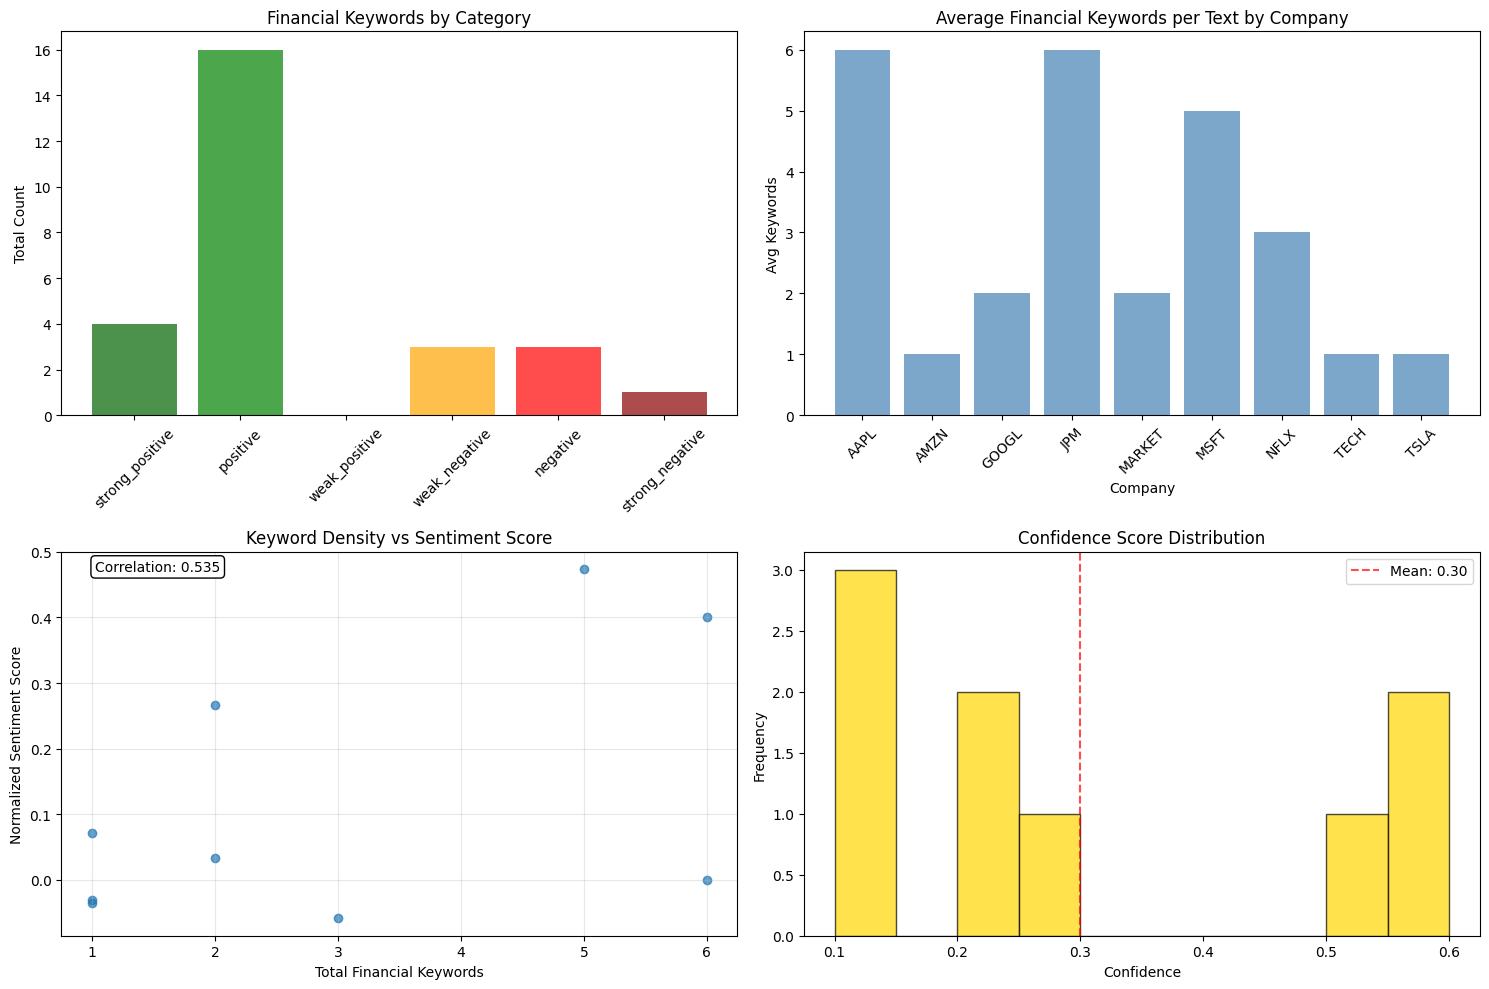


🏆 Company Sentiment Analysis:
Company Sentiment Ranking:
1. 🟢 MSFT: POSITIVE (Score: 0.474, Confidence: 0.50)
2. 🟢 AAPL: POSITIVE (Score: 0.400, Confidence: 0.60)
3. 🟢 GOOGL: POSITIVE (Score: 0.267, Confidence: 0.20)
4. 🟡 AMZN: SLIGHTLY POSITIVE (Score: 0.071, Confidence: 0.10)
5. ⚪ MARKET: NEUTRAL (Score: 0.033, Confidence: 0.20)
6. ⚪ JPM: NEUTRAL (Score: 0.000, Confidence: 0.60)
7. ⚪ TSLA: NEUTRAL (Score: -0.031, Confidence: 0.10)
8. ⚪ TECH: NEUTRAL (Score: -0.036, Confidence: 0.10)
9. 🟠 NFLX: SLIGHTLY NEGATIVE (Score: -0.059, Confidence: 0.30)

📊 Trading Signals Based on Sentiment Analysis:
🚀 MSFT: STRONG_BUY - Score: 0.474, Conf: 0.50
🚀 AAPL: STRONG_BUY - Score: 0.400, Conf: 0.60
⏸️ GOOGL: HOLD - Low confidence (0.20)
⏸️ AMZN: HOLD - Low confidence (0.10)
⏸️ JPM: HOLD - Score: 0.000, Conf: 0.60
⏸️ TSLA: HOLD - Low confidence (0.10)
📉 NFLX: WEAK_SELL - Score: -0.059, Conf: 0.30


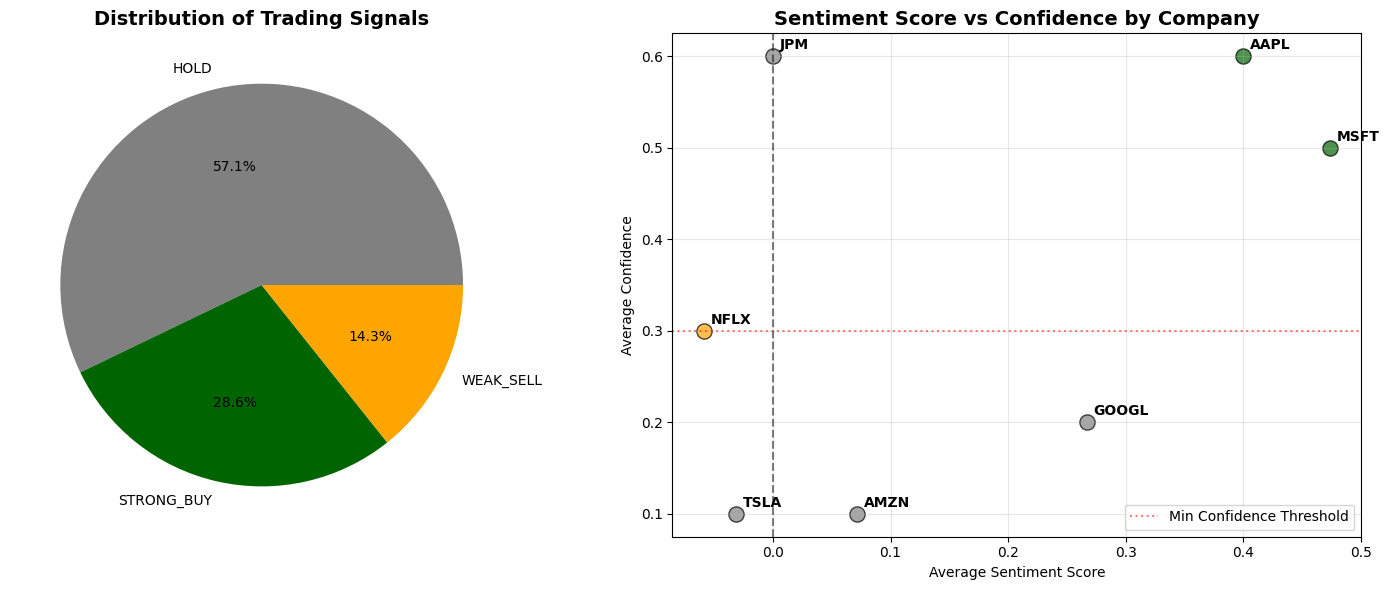


📈 Temporal Sentiment Analysis:


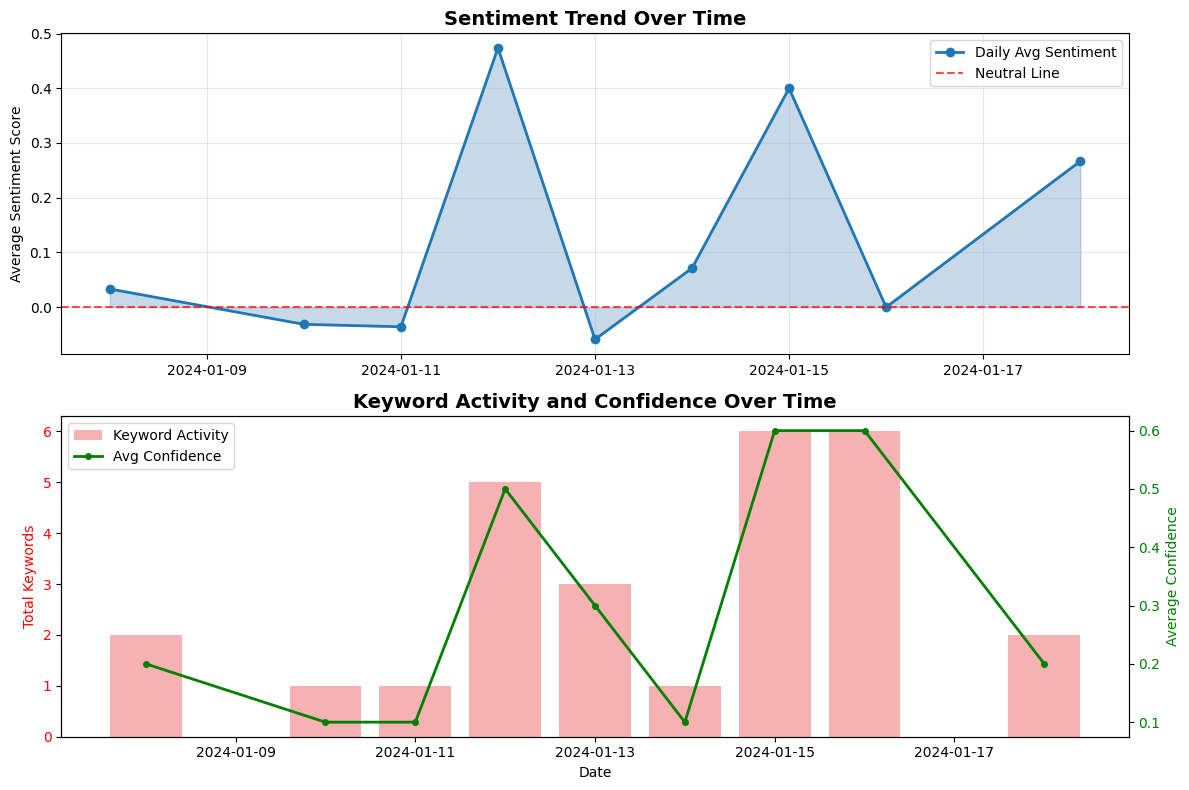


📊 Latest sentiment score: 0.267
📊 Previous sentiment score: 0.000
📊 Sentiment momentum: 0.267
📈 Sentiment is strongly improving

✅ Results saved to sentiment_analysis_results/

🎉 FINANCIAL SENTIMENT ANALYSIS COMPLETE
📊 Total texts analyzed: 9
🏢 Companies covered: 9
📈 Average sentiment score: 0.124
🎯 Trading signals generated: 7
🔍 Total financial keywords found: 27
📊 Average confidence: 0.30

💡 KEY INSIGHTS:
📈 Most positive company: MSFT (0.474)
📉 Most negative company: NFLX (-0.059)

🚀 Analysis completed successfully using pure Python implementation!


In [4]:
#!/usr/bin/env python3
"""
Financial Sentiment Analysis - Pure Python Implementation

This script demonstrates sentiment analysis techniques for financial texts using only built-in libraries:
- Custom keyword-based sentiment analysis
- Financial vocabulary scoring
- Trading signal generation
- Company sentiment ranking
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import re
import warnings
import json
from pathlib import Path
from collections import Counter
import string

warnings.filterwarnings('ignore')

print("📊 Financial Sentiment Analysis Pipeline (Pure Python)")
print("🔧 Using custom keyword-based sentiment analysis")
print("=" * 60)

# Sample financial news articles and earnings call excerpts
financial_texts = [
    {
        'text': 'Apple reported strong quarterly earnings with revenue beating analyst expectations by 5%. iPhone sales showed remarkable growth in emerging markets.',
        'source': 'financial_news',
        'company': 'AAPL',
        'date': '2024-01-15',
        'category': 'earnings'
    },
    {
        'text': 'Tesla faces significant challenges with production delays and supply chain disruptions affecting delivery targets for Q4.',
        'source': 'financial_news', 
        'company': 'TSLA',
        'date': '2024-01-10',
        'category': 'operations'
    },
    {
        'text': 'Microsoft continues to dominate cloud computing market with Azure growth exceeding 30% year-over-year, driving impressive profit margins.',
        'source': 'financial_news',
        'company': 'MSFT', 
        'date': '2024-01-12',
        'category': 'growth'
    },
    {
        'text': 'Federal Reserve signals potential interest rate cuts amid economic uncertainty, creating volatility in financial markets.',
        'source': 'economic_news',
        'company': 'MARKET',
        'date': '2024-01-08', 
        'category': 'macro'
    },
    {
        'text': 'Amazon Web Services reports declining growth rates as competition intensifies in cloud infrastructure space.',
        'source': 'financial_news',
        'company': 'AMZN',
        'date': '2024-01-14',
        'category': 'competition'
    },
    {
        'text': 'JPMorgan Chase beats earnings estimates driven by strong investment banking performance and reduced credit losses.',
        'source': 'earnings_call',
        'company': 'JPM',
        'date': '2024-01-16',
        'category': 'earnings'
    },
    {
        'text': 'Regulatory concerns mount over big tech companies as antitrust investigations expand across multiple jurisdictions.',
        'source': 'regulatory_news',
        'company': 'TECH',
        'date': '2024-01-11',
        'category': 'regulatory'
    },
    {
        'text': 'Google parent Alphabet announces breakthrough in quantum computing, potentially revolutionizing cloud services and AI capabilities.',
        'source': 'tech_news',
        'company': 'GOOGL',
        'date': '2024-01-18',
        'category': 'innovation'
    },
    {
        'text': 'Netflix subscriber growth disappoints as streaming market saturation becomes evident, shares drop 8% in after-hours trading.',
        'source': 'earnings_news',
        'company': 'NFLX',
        'date': '2024-01-13',
        'category': 'earnings'
    }
]

# Convert to DataFrame
df = pd.DataFrame(financial_texts)
df['date'] = pd.to_datetime(df['date'])

print(f"📄 Loaded {len(df)} financial text samples")
print(f"📊 Companies covered: {', '.join(df['company'].unique())}")
print(f"📈 Categories: {', '.join(df['category'].unique())}")
print("\nSample Data:")
print(df.head())

# Enhanced financial keywords for comprehensive sentiment analysis
financial_keywords = {
    'strong_positive': {
        'keywords': [
            'breakthrough', 'revolutionary', 'exceptional', 'outstanding', 'remarkable', 
            'impressive', 'dominate', 'dominates', 'dominating', 'exceeded', 'outperformed',
            'surge', 'soared', 'skyrocketed', 'accelerated', 'robust', 'stellar'
        ],
        'weight': 3.0
    },
    'positive': {
        'keywords': [
            'growth', 'profit', 'revenue', 'earnings', 'beat', 'beats', 'strong', 'increased',
            'improvement', 'success', 'expansion', 'optimistic', 'upturn', 'achievement',
            'gains', 'bullish', 'rising', 'higher', 'better', 'improved', 'advancing',
            'momentum', 'opportunity', 'potential', 'driving', 'solid', 'positive'
        ],
        'weight': 1.0
    },
    'weak_positive': {
        'keywords': [
            'stable', 'maintained', 'consistent', 'steady', 'regular', 'expected',
            'anticipated', 'projected', 'estimated', 'normal', 'unchanged'
        ],
        'weight': 0.3
    },
    'weak_negative': {
        'keywords': [
            'concerns', 'uncertainty', 'cautious', 'mixed', 'moderate', 'slowing',
            'pressure', 'headwinds', 'challenges', 'competitive'
        ],
        'weight': -0.5
    },
    'negative': {
        'keywords': [
            'loss', 'decline', 'declined', 'decreased', 'fell', 'drop', 'dropped', 'weak',
            'missed', 'disappoints', 'disappointing', 'bearish', 'risk', 'downturn', 
            'crisis', 'struggling', 'falling', 'lower', 'worse', 'deteriorating',
            'problems', 'issues', 'difficulties', 'setback', 'underperformed'
        ],
        'weight': -1.0
    },
    'strong_negative': {
        'keywords': [
            'crisis', 'collapse', 'plummeted', 'crashed', 'devastating', 'catastrophic',
            'failed', 'bankruptcy', 'losses', 'recession', 'depression', 'volatile',
            'panic', 'emergency', 'severe', 'major decline', 'significant drop'
        ],
        'weight': -3.0
    }
}

def custom_sentiment_analysis(text):
    """
    Custom sentiment analysis using financial keywords with weighted scoring
    """
    text_lower = text.lower()
    
    # Remove punctuation and split into words
    text_clean = re.sub(r'[^\w\s]', ' ', text_lower)
    words = text_clean.split()
    
    total_score = 0
    word_count = len(words)
    found_keywords = {category: [] for category in financial_keywords.keys()}
    category_counts = {category: 0 for category in financial_keywords.keys()}
    
    # Check for keywords and calculate weighted score
    for category, data in financial_keywords.items():
        keywords = data['keywords']
        weight = data['weight']
        
        for keyword in keywords:
            # Check for exact keyword matches and phrases
            if keyword in text_lower:
                # Count occurrences
                occurrences = text_lower.count(keyword)
                total_score += weight * occurrences
                category_counts[category] += occurrences
                found_keywords[category].extend([keyword] * occurrences)
    
    # Calculate additional metrics
    total_financial_keywords = sum(category_counts.values())
    
    # Normalize score by text length (to handle longer vs shorter texts)
    if word_count > 0:
        normalized_score = total_score / max(word_count, 10)  # Avoid division by very small numbers
    else:
        normalized_score = 0
    
    # Classify sentiment based on normalized score
    if normalized_score > 0.15:
        sentiment = 'very_positive'
    elif normalized_score > 0.05:
        sentiment = 'positive'
    elif normalized_score > -0.05:
        sentiment = 'neutral'
    elif normalized_score > -0.15:
        sentiment = 'negative'
    else:
        sentiment = 'very_negative'
    
    # Calculate confidence based on number of keywords found
    confidence = min(total_financial_keywords / 10.0, 1.0)
    
    # Calculate subjectivity proxy (based on strong emotional keywords)
    emotional_keywords = category_counts['strong_positive'] + category_counts['strong_negative']
    subjectivity = min(emotional_keywords / max(total_financial_keywords, 1), 1.0)
    
    return {
        'sentiment': sentiment,
        'score': total_score,
        'normalized_score': normalized_score,
        'confidence': confidence,
        'subjectivity': subjectivity,
        'word_count': word_count,
        'total_financial_keywords': total_financial_keywords,
        'category_counts': category_counts,
        'found_keywords': found_keywords
    }

# Apply custom sentiment analysis to all texts
print("\n🔄 Analyzing sentiment with custom keyword-based approach...")

sentiment_results = []
for _, row in df.iterrows():
    result = custom_sentiment_analysis(row['text'])
    result.update({
        'company': row['company'],
        'category': row['category'],
        'source': row['source'],
        'date': row['date'],
        'text': row['text']
    })
    sentiment_results.append(result)

sentiment_df = pd.DataFrame(sentiment_results)

print("✅ Sentiment analysis completed")
print("\nSentiment Results Sample:")
print(sentiment_df[['company', 'sentiment', 'normalized_score', 'confidence', 'total_financial_keywords']].head())

# Display detailed keyword analysis
print("\n🔍 Detailed Keyword Analysis:")
for i, row in sentiment_df.head(3).iterrows():
    print(f"\n📝 {row['company']}: {row['sentiment']} (score: {row['normalized_score']:.3f})")
    for category, keywords in row['found_keywords'].items():
        if keywords:
            print(f"   {category}: {', '.join(set(keywords))}")

# Visualize sentiment distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Sentiment distribution
sentiment_counts = sentiment_df['sentiment'].value_counts()
colors_map = {
    'very_positive': 'darkgreen',
    'positive': 'green', 
    'neutral': 'gray',
    'negative': 'red',
    'very_negative': 'darkred'
}
pie_colors = [colors_map.get(s, 'gray') for s in sentiment_counts.index]

axes[0, 0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=pie_colors)
axes[0, 0].set_title('Overall Sentiment Distribution')

# 2. Sentiment score distribution
axes[0, 1].hist(sentiment_df['normalized_score'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 1].set_title('Sentiment Score Distribution')
axes[0, 1].set_xlabel('Normalized Sentiment Score')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Neutral')
axes[0, 1].legend()

# 3. Sentiment by company
company_sentiment = pd.crosstab(sentiment_df['company'], sentiment_df['sentiment'])
company_sentiment.plot(kind='bar', ax=axes[1, 0], stacked=True, 
                      color=[colors_map.get(s, 'gray') for s in company_sentiment.columns])
axes[1, 0].set_title('Sentiment by Company')
axes[1, 0].set_xlabel('Company')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Score vs Confidence scatter
for sentiment in sentiment_df['sentiment'].unique():
    mask = sentiment_df['sentiment'] == sentiment
    axes[1, 1].scatter(sentiment_df[mask]['normalized_score'], 
                      sentiment_df[mask]['confidence'],
                      c=colors_map.get(sentiment, 'gray'), 
                      label=sentiment,
                      alpha=0.7,
                      s=60)

axes[1, 1].set_title('Sentiment Score vs Confidence')
axes[1, 1].set_xlabel('Normalized Score')
axes[1, 1].set_ylabel('Confidence')
axes[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axvline(x=0, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Analyze keyword categories
print("\n📊 Keyword Category Analysis:")
category_totals = {}
for category in financial_keywords.keys():
    category_totals[category] = sentiment_df['category_counts'].apply(lambda x: x[category]).sum()

print("Total keywords found by category:")
for category, count in sorted(category_totals.items(), key=lambda x: x[1], reverse=True):
    print(f"  {category}: {count}")

# Visualize keyword analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Keyword category distribution
axes[0, 0].bar(category_totals.keys(), category_totals.values(), 
               color=['darkgreen', 'green', 'lightgreen', 'orange', 'red', 'darkred'], alpha=0.7)
axes[0, 0].set_title('Financial Keywords by Category')
axes[0, 0].set_ylabel('Total Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Keywords per text by company
company_keywords = sentiment_df.groupby('company')['total_financial_keywords'].mean()
axes[0, 1].bar(company_keywords.index, company_keywords.values, alpha=0.7, color='steelblue')
axes[0, 1].set_title('Average Financial Keywords per Text by Company')
axes[0, 1].set_xlabel('Company')
axes[0, 1].set_ylabel('Avg Keywords')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Score vs keyword density
axes[1, 0].scatter(sentiment_df['total_financial_keywords'], sentiment_df['normalized_score'], alpha=0.7)
axes[1, 0].set_title('Keyword Density vs Sentiment Score')
axes[1, 0].set_xlabel('Total Financial Keywords')
axes[1, 0].set_ylabel('Normalized Sentiment Score')
axes[1, 0].grid(True, alpha=0.3)

# Add correlation
correlation = sentiment_df['total_financial_keywords'].corr(sentiment_df['normalized_score'])
axes[1, 0].text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
                transform=axes[1, 0].transAxes, bbox=dict(boxstyle='round', facecolor='white'))

# 4. Confidence distribution
axes[1, 1].hist(sentiment_df['confidence'], bins=10, alpha=0.7, color='gold', edgecolor='black')
axes[1, 1].set_title('Confidence Score Distribution')
axes[1, 1].set_xlabel('Confidence')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(x=sentiment_df['confidence'].mean(), color='red', linestyle='--', 
                   alpha=0.7, label=f'Mean: {sentiment_df["confidence"].mean():.2f}')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Create company sentiment ranking
print("\n🏆 Company Sentiment Analysis:")

company_stats = sentiment_df.groupby('company').agg({
    'normalized_score': ['mean', 'std', 'min', 'max'],
    'confidence': 'mean',
    'total_financial_keywords': 'mean',
    'subjectivity': 'mean'
}).round(3)

# Flatten column names
company_stats.columns = ['_'.join(col).strip() for col in company_stats.columns.values]

company_ranking = sentiment_df.groupby('company').agg({
    'normalized_score': 'mean',
    'confidence': 'mean'
}).round(3)

company_ranking = company_ranking.sort_values('normalized_score', ascending=False)

print("Company Sentiment Ranking:")
for i, (company, row) in enumerate(company_ranking.iterrows()):
    score = row['normalized_score']
    if score > 0.1:
        emoji = "🟢"
        status = "POSITIVE"
    elif score > 0.05:
        emoji = "🟡" 
        status = "SLIGHTLY POSITIVE"
    elif score < -0.1:
        emoji = "🔴"
        status = "NEGATIVE"
    elif score < -0.05:
        emoji = "🟠"
        status = "SLIGHTLY NEGATIVE"
    else:
        emoji = "⚪"
        status = "NEUTRAL"
    
    print(f"{i+1}. {emoji} {company}: {status} (Score: {score:.3f}, Confidence: {row['confidence']:.2f})")

# Generate trading signals
def generate_trading_signals(score, confidence, min_confidence=0.3):
    """Generate trading signals based on sentiment score and confidence"""
    
    if confidence < min_confidence:
        return {
            'signal': 'HOLD',
            'strength': 'low_confidence',
            'reason': f'Low confidence ({confidence:.2f})'
        }
    
    if score > 0.15:
        signal = 'STRONG_BUY'
        strength = 'strong'
    elif score > 0.08:
        signal = 'BUY'
        strength = 'moderate'
    elif score > 0.03:
        signal = 'WEAK_BUY'
        strength = 'weak'
    elif score < -0.15:
        signal = 'STRONG_SELL'
        strength = 'strong'
    elif score < -0.08:
        signal = 'SELL'
        strength = 'moderate'
    elif score < -0.03:
        signal = 'WEAK_SELL'
        strength = 'weak'
    else:
        signal = 'HOLD'
        strength = 'neutral'
    
    return {
        'signal': signal,
        'strength': strength,
        'reason': f'Score: {score:.3f}, Conf: {confidence:.2f}'
    }

# Generate signals for companies
print("\n📊 Trading Signals Based on Sentiment Analysis:")
print("=" * 60)

trading_signals = []
for company in company_ranking.index:
    if company in ['MARKET', 'TECH']:  # Skip broad categories
        continue
    
    company_data = sentiment_df[sentiment_df['company'] == company]
    avg_score = company_data['normalized_score'].mean()
    avg_confidence = company_data['confidence'].mean()
    text_count = len(company_data)
    
    signal_data = generate_trading_signals(avg_score, avg_confidence)
    signal_data.update({
        'company': company,
        'avg_score': avg_score,
        'avg_confidence': avg_confidence,
        'text_count': text_count
    })
    trading_signals.append(signal_data)

# Sort by score
trading_signals = sorted(trading_signals, key=lambda x: x['avg_score'], reverse=True)

# Display trading signals
emoji_map = {
    'STRONG_BUY': '🚀',
    'BUY': '📈',
    'WEAK_BUY': '📊',
    'HOLD': '⏸️',
    'WEAK_SELL': '📉',
    'SELL': '📉',
    'STRONG_SELL': '💥'
}

for signal in trading_signals:
    emoji = emoji_map.get(signal['signal'], '❓')
    print(f"{emoji} {signal['company']}: {signal['signal']} - {signal['reason']}")

# Create trading signals dataframe
signals_df = pd.DataFrame(trading_signals)

# Visualize trading signals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Signal distribution
if len(signals_df) > 0:
    signal_counts = signals_df['signal'].value_counts()
    colors = {
        'STRONG_BUY': 'darkgreen', 'BUY': 'green', 'WEAK_BUY': 'lightgreen',
        'HOLD': 'gray', 'WEAK_SELL': 'orange', 'SELL': 'red', 'STRONG_SELL': 'darkred'
    }
    signal_colors = [colors.get(signal, 'gray') for signal in signal_counts.index]
    
    ax1.pie(signal_counts.values, labels=signal_counts.index, autopct='%1.1f%%', colors=signal_colors)
    ax1.set_title('Distribution of Trading Signals', fontsize=14, fontweight='bold')
    
    # 2. Score vs Confidence scatter
    for _, row in signals_df.iterrows():
        color = colors.get(row['signal'], 'gray')
        ax2.scatter(row['avg_score'], row['avg_confidence'], c=color, s=120, alpha=0.7, edgecolors='black')
        ax2.annotate(row['company'], (row['avg_score'], row['avg_confidence']), 
                    xytext=(5, 5), textcoords='offset points', fontsize=10, fontweight='bold')
    
    ax2.set_title('Sentiment Score vs Confidence by Company', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Average Sentiment Score')
    ax2.set_ylabel('Average Confidence')
    ax2.grid(True, alpha=0.3)
    ax2.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    ax2.axhline(y=0.3, color='red', linestyle=':', alpha=0.5, label='Min Confidence Threshold')
    ax2.legend()

plt.tight_layout()
plt.show()

# Time-series analysis
print("\n📈 Temporal Sentiment Analysis:")
daily_sentiment = sentiment_df.groupby('date').agg({
    'normalized_score': 'mean',
    'confidence': 'mean',
    'total_financial_keywords': 'sum'
}).reset_index()

daily_sentiment = daily_sentiment.sort_values('date')

# Plot time series
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# 1. Sentiment over time
axes[0].plot(daily_sentiment['date'], daily_sentiment['normalized_score'], 
            marker='o', linewidth=2, markersize=6, label='Daily Avg Sentiment')
axes[0].fill_between(daily_sentiment['date'], daily_sentiment['normalized_score'], 
                    alpha=0.3, color='steelblue')
axes[0].set_title('Sentiment Trend Over Time', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Average Sentiment Score')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='red', linestyle='--', alpha=0.7, label='Neutral Line')
axes[0].legend()

# 2. Activity and confidence over time
ax2_twin = axes[1].twinx()

bars = axes[1].bar(daily_sentiment['date'], daily_sentiment['total_financial_keywords'], 
                  alpha=0.6, color='lightcoral', label='Keyword Activity')
line = ax2_twin.plot(daily_sentiment['date'], daily_sentiment['confidence'], 
                    'g-o', linewidth=2, markersize=4, label='Avg Confidence')

axes[1].set_title('Keyword Activity and Confidence Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Total Keywords', color='red')
ax2_twin.set_ylabel('Average Confidence', color='green')
axes[1].tick_params(axis='y', labelcolor='red')
ax2_twin.tick_params(axis='y', labelcolor='green')

# Combine legends
lines1, labels1 = axes[1].get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
axes[1].legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

# Calculate momentum
if len(daily_sentiment) > 1:
    latest_sentiment = daily_sentiment['normalized_score'].iloc[-1]
    previous_sentiment = daily_sentiment['normalized_score'].iloc[-2]
    momentum = latest_sentiment - previous_sentiment
    
    print(f"\n📊 Latest sentiment score: {latest_sentiment:.3f}")
    print(f"📊 Previous sentiment score: {previous_sentiment:.3f}")
    print(f"📊 Sentiment momentum: {momentum:.3f}")
    
    if momentum > 0.05:
        print("📈 Sentiment is strongly improving")
    elif momentum > 0.02:
        print("📈 Sentiment is improving")
    elif momentum < -0.05:
        print("📉 Sentiment is strongly deteriorating")
    elif momentum < -0.02:
        print("📉 Sentiment is deteriorating")
    else:
        print("📊 Sentiment is stable")

# Save results
try:
    output_dir = Path('./sentiment_analysis_results')
    output_dir.mkdir(exist_ok=True)
    
    # Save detailed results
    sentiment_df.to_csv(output_dir / 'detailed_sentiment_analysis.csv', index=False)
    if len(signals_df) > 0:
        signals_df.to_csv(output_dir / 'trading_signals.csv', index=False)
    company_ranking.to_csv(output_dir / 'company_sentiment_ranking.csv')
    
    # Create summary report
    summary_report = {
        'analysis_date': datetime.now().isoformat(),
        'total_texts_analyzed': len(sentiment_df),
        'companies_covered': list(sentiment_df['company'].unique()),
        'sentiment_distribution': sentiment_df['sentiment'].value_counts().to_dict(),
        'average_sentiment_score': float(sentiment_df['normalized_score'].mean()),
        'average_confidence': float(sentiment_df['confidence'].mean()),
        'trading_signals_generated': len(trading_signals),
        'methodology': 'Custom keyword-based financial sentiment analysis',
        'keyword_categories': len(financial_keywords)
    }
    
    with open(output_dir / 'analysis_summary.json', 'w') as f:
        json.dump(summary_report, f, indent=2, default=str)
    
    print(f"\n✅ Results saved to {output_dir}/")
    
except Exception as e:
    print(f"⚠️  Could not save files: {e}")

# Final summary
print("\n" + "="*60)
print("🎉 FINANCIAL SENTIMENT ANALYSIS COMPLETE")
print("="*60)
print(f"📊 Total texts analyzed: {len(sentiment_df)}")
print(f"🏢 Companies covered: {len(sentiment_df['company'].unique())}")
print(f"📈 Average sentiment score: {sentiment_df['normalized_score'].mean():.3f}")
print(f"🎯 Trading signals generated: {len(trading_signals)}")
print(f"🔍 Total financial keywords found: {sentiment_df['total_financial_keywords'].sum()}")
print(f"📊 Average confidence: {sentiment_df['confidence'].mean():.2f}")

# Top insights
print(f"\n💡 KEY INSIGHTS:")
if len(company_ranking) > 0:
    most_positive = company_ranking.index[0]
    most_negative = company_ranking.index[-1]
    print(f"📈 Most positive company: {most_positive} ({company_ranking.loc[most_positive, 'normalized_score']:.3f})")
    print(f"📉 Most negative company: {most_negative} ({company_ranking.loc[most_negative, 'normalized_score']:.3f})")

print("\n🚀 Analysis completed successfully using pure Python implementation!")